In [1]:
# !pip3 install numpy
# !pip3 install scipy
# !pip3 install pandas
# !pip3 install matplotlib
# !pip3 install sympy
!pip3 install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import axes3d
from sympy import *
from sympy.physics.quantum.dagger import Dagger
import seaborn as sns

In [3]:
def multiple_formatter(denominator=2, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = np.int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

class Multiple:
    def __init__(self, denominator=2, number=np.pi, latex='\pi'):
        self.denominator = denominator
        self.number = number
        self.latex = latex

    def locator(self):
        return plt.MultipleLocator(self.number / self.denominator)

    def formatter(self):
        return plt.FuncFormatter(multiple_formatter(self.denominator, self.number, self.latex))

## PLOTS

In [4]:
t,p,ta,pa = symbols('theta phi theta_a phi_a', real=True)

### Example 1

In [5]:
G = 0.5*Matrix([[cos(p/2)**2, I*cos(p/2)*sin(p/2), cos(p/2), 0],[-I*cos(p/2)*sin(p/2), sin(p/2)**2, -I*sin(p/2),0],
            [cos(p/2),I*sin(p/2),1,0],[0,0,0,0]])
G

Matrix([
[           0.5*cos(phi/2)**2, 0.5*I*sin(phi/2)*cos(phi/2),    0.5*cos(phi/2), 0],
[-0.5*I*sin(phi/2)*cos(phi/2),           0.5*sin(phi/2)**2, -0.5*I*sin(phi/2), 0],
[              0.5*cos(phi/2),            0.5*I*sin(phi/2),               0.5, 0],
[                           0,                           0,                 0, 0]])

In [6]:
Gpol=simplify(Matrix([[G[0,0]+G[1,1],G[0,2]+G[1,3]],[G[2,0]+G[3,1],G[2,2]+G[3,3]]]))
Gpol

Matrix([
[           0.5, 0.5*cos(phi/2)],
[0.5*cos(phi/2),            0.5]])

In [7]:
Gpar=simplify(Matrix([[G[0,0]+G[2,2],G[0,1]+G[2,3]],[G[1,0]+G[3,2],G[1,1]+G[3,3]]]))
Gpar

Matrix([
[0.25*cos(phi) + 0.75,   0.25*I*sin(phi)],
[    -0.25*I*sin(phi), 0.5*sin(phi/2)**2]])

In [8]:
dpol=simplify(sqrt(1-4*simplify(Determinant(Gpol))/(simplify(Trace(Gpol))**2)))
dpol

1.0*Abs(cos(phi/2))

In [9]:
dpar=simplify(sqrt(1-4*simplify(Determinant(Gpar))/(simplify(Trace(Gpar))**2)))
dpar

0.707106781186548*sqrt(cos(phi) + 1)

In [10]:
def Dplotting(option):
    fig, ax = plt.subplots(figsize=(10, 10))

    phi=np.arange(0,2*np.pi,0.001)
    dpolvalues = lambdify(p, dpol, "numpy")(phi)
    dparvalues = lambdify(p, dpar, "numpy")(phi)
    
    if option=='dpol':
        dpolplot=sns.lineplot(x=phi,y=dpolvalues,linewidth = 3,color='b')
        dpolplot.axes.set_title(r'$D_{pol}\ vs\ \phi$',fontsize=40)
        dpolplot.set_xlabel(r"$\phi$",fontsize=20)
        dpolplot.set_ylabel(r'$D_{pol}$',fontsize=20)
        dpolplot.tick_params(labelsize=20)
    else:
        dparplot=sns.lineplot(x=phi,y=dparvalues,linewidth = 3,color='r')
        dparplot.axes.set_title(r'$D_{par}\ vs\ \phi$',fontsize=40)
        dparplot.set_xlabel(r"$\phi$",fontsize=20)
        dparplot.set_ylabel(r'$D_{par}$',fontsize=20)
        dparplot.tick_params(labelsize=20)    

    plt.show()
    return
interact(Dplotting, option=['dpol','dpar']);

interactive(children=(Dropdown(description='option', options=('dpol', 'dpar'), value='dpol'), Output()), _dom_…

#### Contour Plot Sample

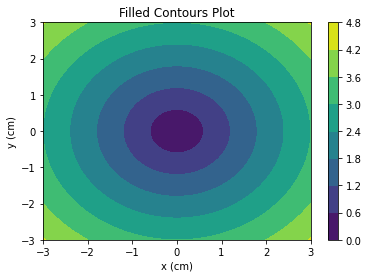

In [11]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(xlist, ylist)
Z = np.sqrt(X**2 + Y**2)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.show()

## Experiment A

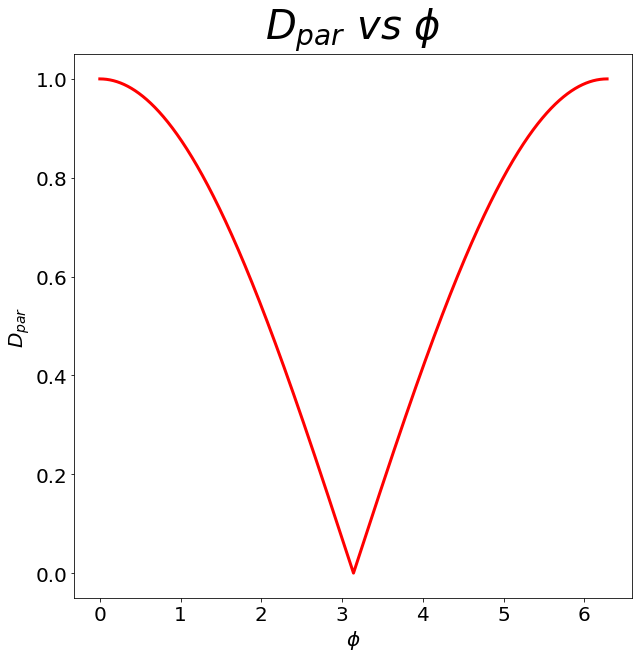

In [12]:
Dplotting(dpol)

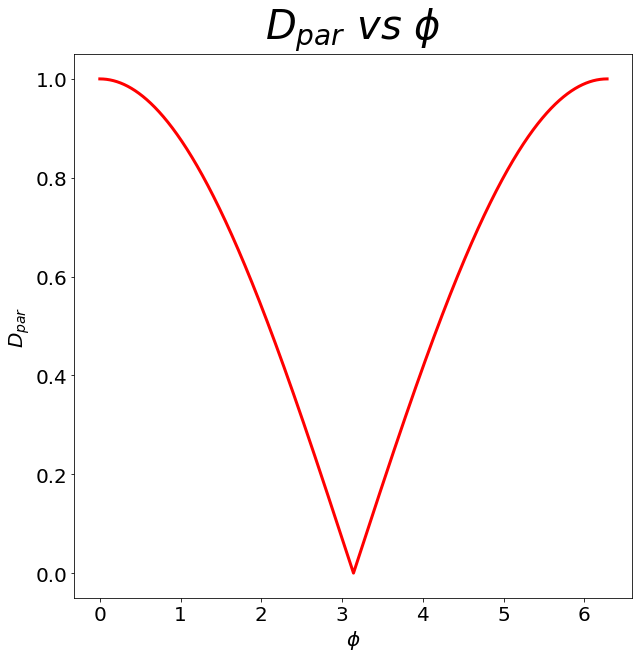

In [13]:
Dplotting(dpar)

(array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <a list of 9 Text major ticklabel objects>)

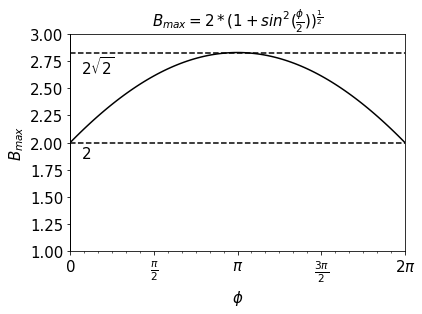

In [14]:
x=np.linspace(0, 2*np.pi, 101)
y=np.sin(x/2)
y=2*(1+y)**(0.5)
plt.plot(x,y, color="black")
plt.title(r'$B_{max} = 2*(1+sin^{2}(\frac{\phi}{2}))^{\frac{1}{2}}$', fontsize=15)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$B_{max}$', fontsize=15)
plt.plot(x,[8**(0.5)]*101,color='black', linestyle ='dashed')
plt.plot(x,[2]*101,color='black', linestyle ='dashed')
plt.figtext(s=r'$2\sqrt{2}$', x=0.15, y=0.74, fontsize=15)
plt.figtext(s=r'$2$', x=0.15, y=0.45, fontsize=15)
plt.xlim(0,2*np.pi)
plt.ylim(1,3)
ax=plt.gca()
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

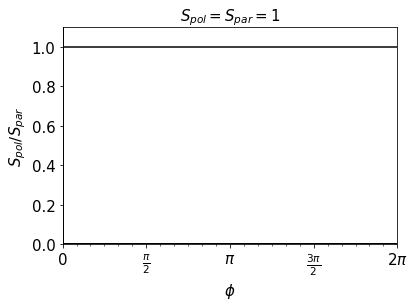

In [15]:
x=np.linspace(0, 2*np.pi, 101)
plt.plot(x,[1]*101, color="black")
plt.title(r'$S_{pol}=S_{par}=1$', fontsize=15)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$S_{pol} \slash S_{par}$', fontsize=15)
plt.xlim(0,2*np.pi)
plt.ylim(0,1.1)
ax=plt.gca()
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

## Experiment B

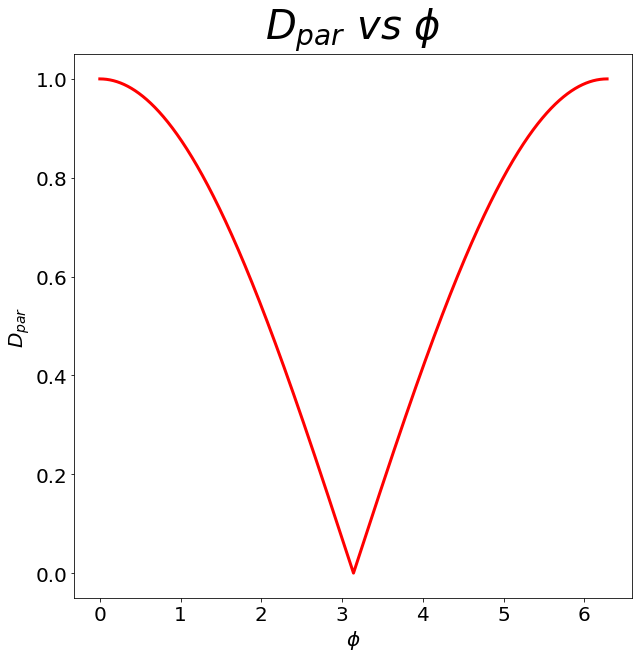

In [16]:
Dplotting(dpol)

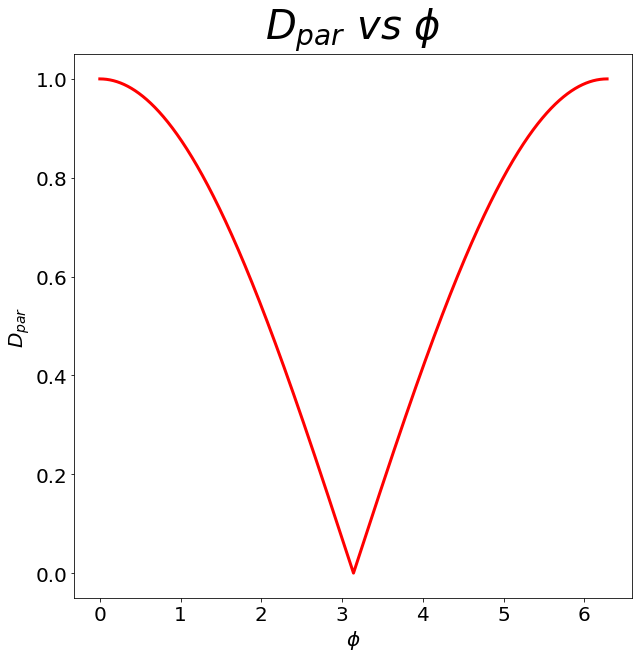

In [17]:
Dplotting(dpar)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text major ticklabel objects>)

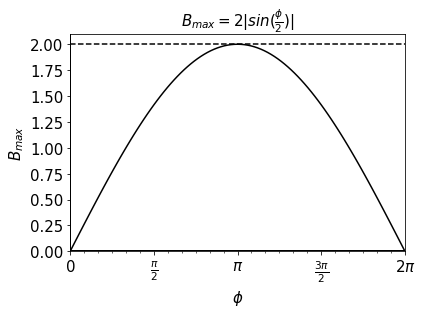

In [18]:
x=np.linspace(0, 2*np.pi, 101)
y=2*abs(np.sin(x/2))
plt.plot(x,y, color="black")
plt.title(r'$B_{max} = 2|sin(\frac{\phi}{2})|$', fontsize=15)
plt.xlabel(r'$\phi$', fontsize=15)
plt.ylabel(r'$B_{max}$', fontsize=15)
plt.plot(x,[2]*101,color='black', linestyle ='dashed')
plt.xlim(0,2*np.pi)
plt.ylim(0,2.1)
ax=plt.gca()
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

([<matplotlib.axis.YTick at 0x28b6ca49588>,
 <a list of 3 Text major ticklabel objects>)

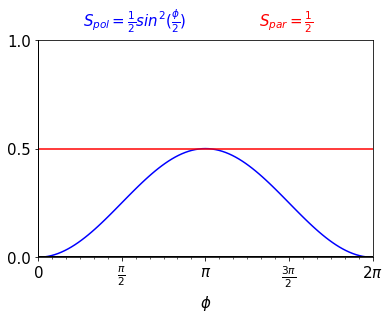

In [19]:
x=np.linspace(0, 2*np.pi, 101)
y=0.5*(np.sin(x/2))**2
plt.plot(x,y, color="blue")
plt.plot(x,[0.5]*101,color='red')
fig1 = plt.figure(1)
fig1.text(0.35, 0.9,r'$S_{pol} = \frac{1}{2}sin^{2}(\frac{\phi}{2})$', ha="center", va="bottom", size="medium",color="blue",fontsize=15)
fig1.text(0.7,0.9,r'$S_{par} = \frac{1}{2}$', ha="center", va="bottom", size="medium",color="red", fontsize=15)
plt.xlabel(r'$\phi$', fontsize=15)
plt.xlim(0,2*np.pi)
plt.ylim(0,1)
ax=plt.gca()
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))
plt.xticks(fontsize =15)
plt.yticks([0, 0.5,1], fontsize =15)

## Experiment C

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

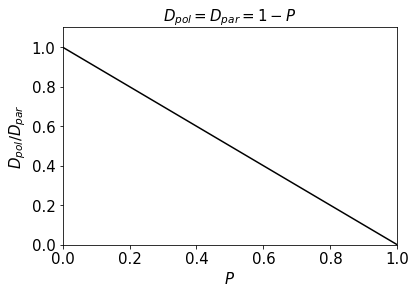

In [20]:
x=np.linspace(0, 1, 101)
y=1-x
plt.plot(x,y, color="black")
plt.title(r'$D_{pol}=D_{par}=1-P$', fontsize=15)
plt.xlabel(r'$P$', fontsize=15)
plt.ylabel(r'$D_{pol} \slash D_{par}$', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

(array([1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ]),
 <a list of 9 Text major ticklabel objects>)

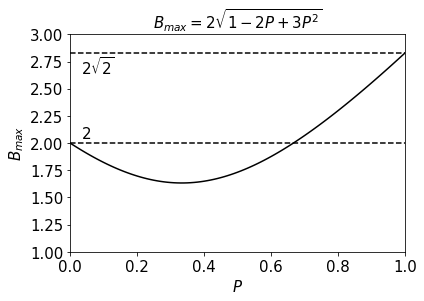

In [21]:
x=np.linspace(0, 1, 101)
y=2*(1-2*x+3*x**2)**(0.5)
plt.plot(x,y, color="black")
plt.title(r'$B_{max}=2\sqrt{1-2P+3P^2}$', fontsize=15)
plt.xlabel(r'$P$', fontsize=15)
plt.ylabel(r'$B_{max}$', fontsize=15)
plt.xlim(0,1)
plt.ylim(1,3)
plt.plot(x,[8**(0.5)]*101,color='black', linestyle ='dashed')
plt.plot(x,[2]*101,color='black', linestyle ='dashed')
plt.figtext(s=r'$2\sqrt{2}$', x=0.15, y=0.74, fontsize=15)
plt.figtext(s=r'$2$', x=0.15, y=0.52, fontsize=15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 <a list of 7 Text major ticklabel objects>)

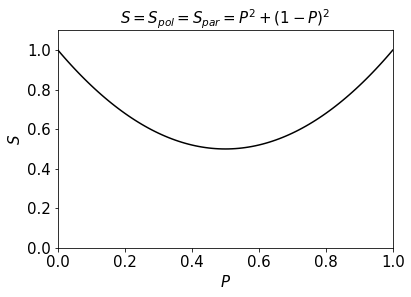

In [22]:
x=np.linspace(0, 1, 101)
y=1-2*x+2*x**2
plt.plot(x,y, color="black")
plt.title(r'$S=S_{pol}=S_{par}=P^2+(1-P)^2$', fontsize=15)
plt.xlabel(r'$P$', fontsize=15)
plt.ylabel(r'$S$', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1.1)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)